# Table of Contents
 <p><div class="lev2"><a href="#Individual-Trajectories-are-Confined"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Individual Trajectories are Confined</a></div><div class="lev2"><a href="#MS(C)Ds-Measure-Confinement"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>MS(C)Ds Measure Confinement</a></div><div class="lev3"><a href="#MSCDs"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>MSCDs</a></div><div class="lev3"><a href="#MSDs"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>MSDs</a></div><div class="lev2"><a href="#TODO:-figure-out-what-the-above-histogram-should-look-like-if-the-loops-locations-are-Poisson-(as-in-simulation)"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>TODO: figure out what the above histogram should look like if the loops locations are Poisson (as in simulation)</a></div><div class="lev2"><a href="#Simulation-MS(C)Ds"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Simulation MS(C)Ds</a></div><div class="lev2"><a href="#Data-MS(C)Ds"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Data MS(C)Ds</a></div>

In [2]:
from pathlib import Path

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import multi_locus_analysis as mla
import multi_locus_analysis.examples.burgess as burgess
from multi_locus_analysis.examples.burgess import msds

## Individual Trajectories are Confined

In [ ]:
msds = pd.read_csv(burgess.burgess_dir / Path('msds_vel_double_counted.csv'))

In [ ]:
mscds = pd.read_csv(burgess.burgess_dir / Path('msds_dvel_double_counted.csv'))

## MS(C)Ds Measure Confinement

In [3]:
abs_msd = msds.msd(burgess.df, mscd=False, include_z=True, 
                   traj_group=burgess.cell_cols, 
                   groups=burgess.cell_cols, deltas=[30, 60, 90, 120])

/home/bbeltr1/.miniconda/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
abs_msd.head()

mean       std  count  \
locus genotype exp.rep meiosis cell delta                              
HET5  WT       2       t0      1    30     0.942050  0.511833    188   
                                    60     1.046405  0.524870    184   
                                    90     1.156547  0.529612    180   
                                    120    1.231244  0.563293    176   
                               7    30     1.151317  0.577355    196   

                                                ste  ste_norm  
locus genotype exp.rep meiosis cell delta                      
HET5  WT       2       t0      1    30     0.037429  0.037379  
                                    60     0.038799  0.038747  
                                    90     0.039585  0.039530  
                                    120    0.042581  0.042520  
                               7    30     0.041345  0.041292

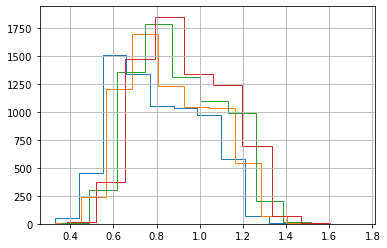

In [17]:
for d, m in abs_msd.groupby('delta')['mean']:
    np.sqrt(m).hist(histtype='step')

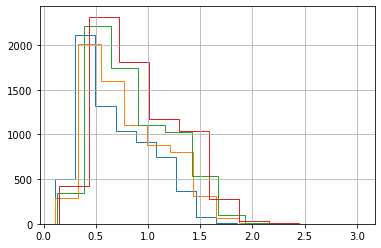

In [18]:
for d, m in abs_msd.groupby('delta')['mean']:
    m.hist(histtype='step')

In [5]:
mscds = msds.msd(burgess.df_flat, mscd=True, include_z=True, 
                   traj_group=burgess.cell_cols, 
                   groups=burgess.cell_cols, deltas=[30, 60, 90, 120])

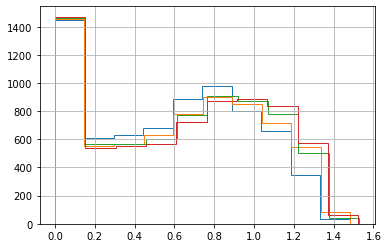

In [6]:
for d, m in mscds.groupby('delta')['mean']:
    np.sqrt(m).hist(histtype='step')

### MSCDs

In [1]:
plt.figure()
cmap =  mpl.cm.get_cmap('viridis')
cnorm = mpl.colors.Normalize(vmin=0, vmax=6)
for d, m in mscds.groupby(['locus', 'meiosis', 'delta'])['mean']:
    if d[0] != 'URA3':
        continue
    if d[2] != 120:
        continue
    if d[1] not in ['t0', 't3', 't4', 't5', 't6']:
        continue
    m.hist(histtype='step', normed=1, bins=np.linspace(0, 2.5, 50), color=cmap(cnorm(int(d[1][1]))))
    plt.title(d[1])
    plt.yscale('log')
#     plt.xscale('log')
    plt.ylim([0.02, 10])

NameError: name 'plt' is not defined

/home/bbeltr1/.miniconda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


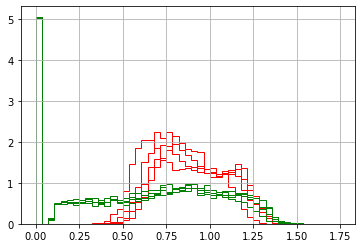

In [7]:
for d, m in abs_msd.groupby('delta')['mean']:
    np.sqrt(m).hist(histtype='step', color='r', normed=1, bins=np.linspace(0, 1.75, 50))
for d, m in mscds.groupby('delta')['mean']:
    np.sqrt(m).hist(histtype='step', color='g', normed=1, bins=np.linspace(0, 1.75, 50))
    

### MSDs

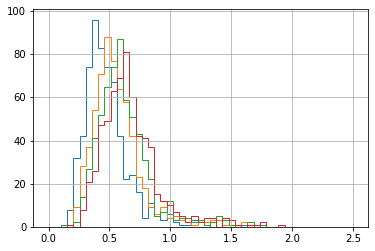

In [34]:
for d, m in abs_msd.groupby(['locus', 'meiosis', 'delta'])['mean']:
    if d[0] != 'URA3':
        continue
    if d[1] != 't0':
        continue
    m[m>0].hist(histtype='step', bins=np.linspace(0, 2.5, 50))

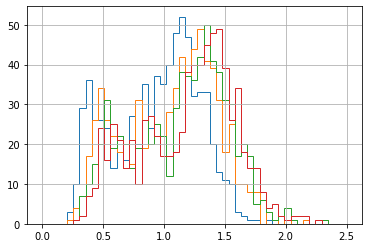

In [35]:
for d, m in abs_msd.groupby(['locus', 'meiosis', 'delta'])['mean']:
    if d[0] != 'URA3':
        continue
    if d[1] != 't3':
        continue
    m[m>0].hist(histtype='step', bins=np.linspace(0, 2.5, 50))

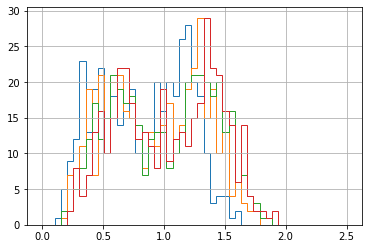

In [36]:
for d, m in abs_msd.groupby(['locus', 'meiosis', 'delta'])['mean']:
    if d[0] != 'URA3':
        continue
    if d[1] != 't5':
        continue
    m[m>0].hist(histtype='step', bins=np.linspace(0, 2.5, 50))

## TODO: figure out what the above histogram should look like if the loops locations are Poisson (as in simulation)

In [ ]:
abs_ms

probability of locus being in a loop of size $n$ is $(1 - f)^{n-1} f$, where $f$ is the "fraction of beads bound" (it is uniformly distributed inside this loop).

the loop is really just like two entropic strings (made of polymer of lengths $N_\Delta$ and $N - N_\Delta$ for a loop of length $N$

$$ k_1 = \frac{3k_B T}{N_\Delta b^2} $$
$$ k_2 = \frac{3k_B T}{(N - N_\Delta) b^2} $$

so 

$$ \langle R^2 \rangle = \frac{3k_BT}{k_1 + k_2} = b^2 \left( \frac{1}{ 1/N_\Delta + 1/(N - N_\Delta) } \right) $$

## Simulation MS(C)Ds

## Data MS(C)Ds

In [ ]:
mscds = pd.read_csv('/home/bbeltr1/developer/bbeltr1/developer/multi_locus_analysis/')